In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("슝=3")

슝=3


In [2]:
#포지셔널 인코딩 레이어
class PositionalEncdoing(tf.keras.layers.Layer):
    
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)
        
    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles
    
    def positional_encoding(self, position, d_model):
        #각도 배열 생성
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        
        #배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        #배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])
        
        #sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0 )
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0])
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])
        
        pos_encoding = pos_encoding[tf.newaixs, ...]
        return tf.cast(post_encoding, tf.float32)
    
    
    def call(self, inputs):
        return inputs + self.post_encoding[:, :tf.shape(inputs)[1], :]
    
    
print('test')
    

test


In [3]:
# sample_pos_encoding = 

# plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
# plt.xlable('Depth')
# xlt.xlim((50, 512))

# plt.ylabel('Position')
# plt.colorbar()
# plt.show()

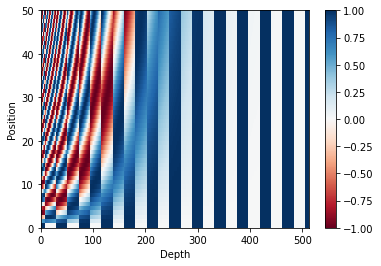

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# PositionalEncoding 레이어 인스턴스화
sample_pos_encoding = PositionalEncoding(position=50, d_model=512)

# 시각화를 위해 numpy 배열로 변환하여 출력
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()


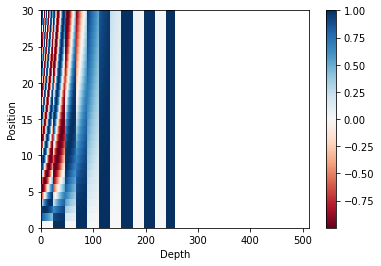

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf

class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# PositionalEncoding 레이어 인스턴스화
sample_pos_encoding = PositionalEncoding(position=30, d_model=256)

# 시각화를 위해 numpy 배열로 변환하여 출력
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()


In [6]:
#스케일드 닷 프로덕트 어텐션 함수

def scaled_dot_product_attention(query, key, value, mask):
    #어텐션 가중치는 Q와 K의 닷 프로덕트
    matmul_qk = tf.matmul(query, key, transpose_b =True)
    
    #가중치를 정규화
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    
    #패딩에 마스크 추가
    if mask is not None:
        logits += (mask * -1e9)
        
        
    
    # softmax 적용
    attention_weights = tf.nn.softmax(logits, axis=-1)
    
    #최종 어텐션은 가중치와 V의 닷 프로덕트
    output = tf.matmul(attention_weights, value)
    return output

print('먀먀오')

먀먀오


이 글에서 앞으로 어텐션을 수행한다고 한다면, 스케일드 닷 프로덕트 어텐션을 의미합니다!

In [8]:
class MultiHeadAttention(tf.keras.layers.Layer):
    
    def __init__(self, d_model, num_heads, name='multi_head_attention'):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        
        self.query_dense = tf.keras.layers.Dense(units=d_model) 
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)
        
        self.dense = tf.keras.layers.Dense(units=d_model)
        

        
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
        
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])
    
    
    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        
        batch_size = tf.shape(query)[0]
        
        
    
        # Q, K, V에 각각 Dense를 적용하다.
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)
        
        #병렬 연산을 위해 머리를 여러 개 만들기
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        
        #스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)하다.
        concat_attention = tf.reshape(scaled_attention,
                                     (batch_size, -1, self.d_model))
        
        #최종 결과에도 Dense를 한 번 더 적용하다,
        outputs = self.dense(concat_attention)
        
        
        return outputs
    
print('슝슝슝')


슝슝슝


In [9]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    
    return mask[:, tf.newaxis, tf.newaxis, :]

print('슝슝슝')

슝슝슝


In [10]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [11]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [12]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)
print('meow')

meow


직접 입력을 넣어 테스트해 봅시다.

In [13]:
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


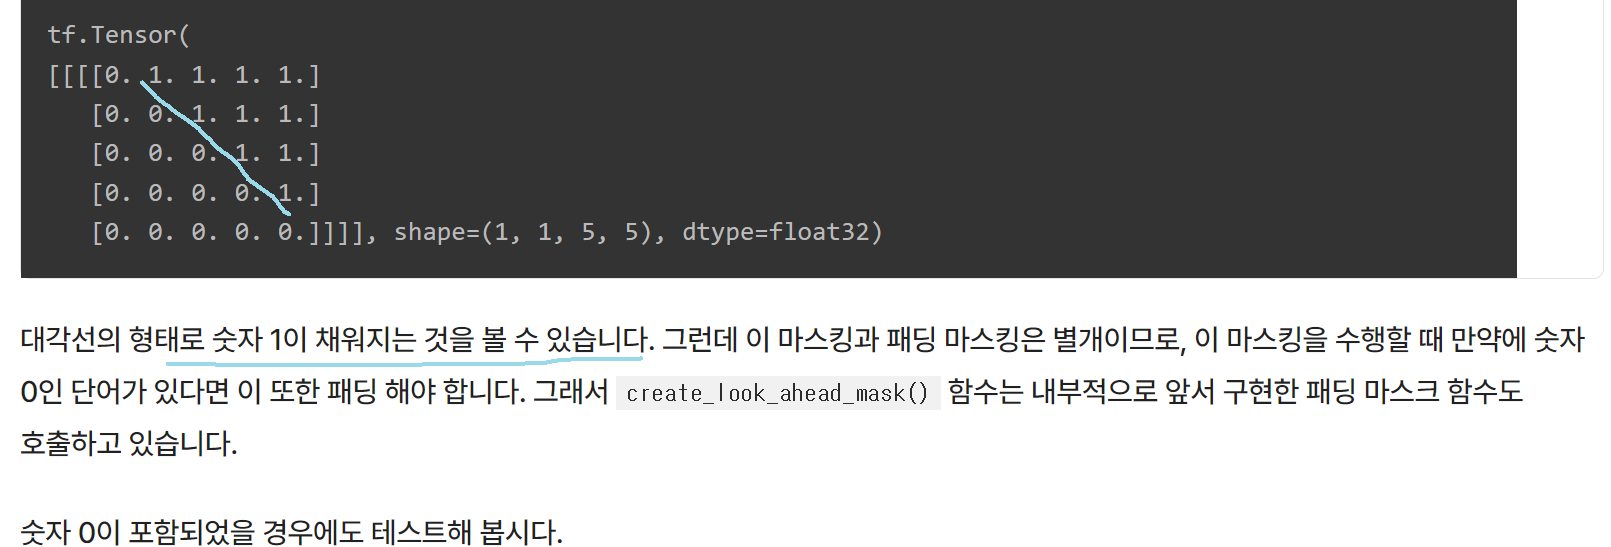

In [14]:
print(create_look_ahead_mask(tf.constant([[0, 5, 1,5,5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [15]:
#인코더 하나의 레이어를 함수로 구현
#이 하나의 레이어 안에는 두 개의 서브 레이어가 존재
def encoder_layer(units, d_model, num_heads, dropout, name='encoder_layer'):
    inputs = tf.keras.Input(shape=(None, d_model), name='inputs')
    
    #패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    #첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행(셀프 어텐션)
    attention = MultiHeadAttention(
    d_model, num_heads, name='attention')({
        'query': inputs,
        'key' : inputs,
        'value' : inputs,
        'mask' : padding_mask
    })
    
    #어텐션의 결과는 Dropout과  Layer Normalization이라는 훈련을 돕는 테크닉 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)
    
    # 두 번째 서브 레이어 : 2개의 완전 연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    #완전 연결층의 결과는 Dropout과 LayerNormalizaiton이라는 훈련을 돕는 테크닉 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)
    
    return tf.keras.Model(
        inputs = [inputs, padding_mask], outputs=outputs, name=name)

print('휴휴')


휴휴


In [16]:
def encoder(vocab_size,
           num_layers,
           units,
           d_model,
           num_heads,
           dropout,
           name='encoder'):
    
    inputs = tf.keras.Input(shape=(None, ), name='inputs')
    
    #패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    #임베딩 레이어 
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    
    #포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings) 
    
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
    
    # num_layers 만큼 쌓아올린 인코더의 층
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model = d_model,
            num_heads=num_heads,
            dropout = dropout,
            name='encoder_layer_{}'.format(i),
        )([outputs, padding_mask])
        
        
        
    return tf.keras.Model(
    
        inputs =[inputs, padding_mask], outputs=outputs, name=name)

print('미미')

미미


In [17]:
#디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재함.
def decoder_layer(units, d_model, num_heads, dropout, name='decoder_layer'):
    inputs = tf.keras.Input(shape=(None, d_model), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    #첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행(셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name='attention_1')(inputs={
                'query':inputs,
                'key' : inputs,
                'value': inputs,
                'mask' : look_ahead_mask
        
    })
    
    #멀티 헤드 어켄션의 결과는 LayerNomralization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)
    
    #두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행(인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name='attention_2')(inputs={
            'query': attention1,
            'key': enc_outputs,
            'value': enc_outputs,
            'mask': padding_mask
    })
    
    #마스크드 멀티 헤드 어텐션의 결과는 ,
    #Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행 
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)
    
    
    #세 번째 서브 레이어 : 2개의 완전 연결층 
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    
    #완전 연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)
    
    
    
    return tf.keras.Model(
        inputs =[inputs, enc_outputs, look_ahead_mask, padding_mask],

        outputs = outputs, 
        name = name)

print('슝슝슝')
    

슝슝슝


In [18]:
def decoder(vocab_size,
           num_layers,
           units,
           d_model,
           num_heads,
           dropout,
           name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')
    
    #패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    #임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    
    #포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    
    #Dropout 이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
    
    for i in range(num_layers):
        outputs = decoder_layer(
            units = units,
            d_model = d_model,
            num_heads = num_heads,
            dropout = dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])
        
        
        
    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name
    )

print('ㅎㅅㅇ')

ㅎㅅㅇ


In [19]:
# path_to_zip = tf.keras.utils.get_file(
#         'cornell_movie_dialogs.zip',
#         origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
#         extract=True)

# path_to_dataset = os.path.join(
#         os.path.dirname(path_to_zip), 'cornell movie-dialogs corpus')
path_to_dataset = os.getenv("HOME") + "/aiffel"    
file_path = os.getenv("HOME") + "/aiffel" 
path_to_movie_lines = os.path.join(path_to_dataset, 'ChatbotData.csv')
path_to_movie_conversations = os.path.join(path_to_dataset,'ChatbotData .csv')



print('오야스미')

"""
path_to_zip = tf.keras.utils.get_file(
        'cornell_movie_dialogs.zip',
        origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
        extract=True)

path_to_dataset = os.path.join(
        os.path.dirname(path_to_zip), 'cornell movie-dialogs corpus')

path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')

print('오야스미')



"""

오야스미


"\npath_to_zip = tf.keras.utils.get_file(\n        'cornell_movie_dialogs.zip',\n        origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',\n        extract=True)\n\npath_to_dataset = os.path.join(\n        os.path.dirname(path_to_zip), 'cornell movie-dialogs corpus')\n\npath_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')\npath_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')\n\nprint('오야스미')\n\n\n\n"

In [20]:
import os
import csv

# ChatbotData.csv 파일 경로
path_to_chatbot_data = os.path.join(path_to_dataset, 'ChatbotData.csv')

# 질의와 응답을 저장할 리스트 초기화
questions = []
answers = []

# ChatbotData.csv 파일 읽기
with open(path_to_chatbot_data, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        # 각 줄에서 질의와 응답 추출하여 리스트에 추가
        questions.append(row[0])  # 첫 번째 열은 질의
        answers.append(row[1])    # 두 번째 열은 응답

# 테스트 출력
for question, answer in zip(questions, answers):
    print(f"질문: {question}")
    print(f"답변: {answer}")
    print()


질문: Q
답변: A

질문: 12시 땡!
답변: 하루가 또 가네요.

질문: 1지망 학교 떨어졌어
답변: 위로해 드립니다.

질문: 3박4일 놀러가고 싶다
답변: 여행은 언제나 좋죠.

질문: 3박4일 정도 놀러가고 싶다
답변: 여행은 언제나 좋죠.

질문: PPL 심하네
답변: 눈살이 찌푸려지죠.

질문: SD카드 망가졌어
답변: 다시 새로 사는 게 마음 편해요.

질문: SD카드 안돼
답변: 다시 새로 사는 게 마음 편해요.

질문: SNS 맞팔 왜 안하지ㅠㅠ
답변: 잘 모르고 있을 수도 있어요.

질문: SNS 시간낭비인 거 아는데 매일 하는 중
답변: 시간을 정하고 해보세요.

질문: SNS 시간낭비인데 자꾸 보게됨
답변: 시간을 정하고 해보세요.

질문: SNS보면 나만 빼고 다 행복해보여
답변: 자랑하는 자리니까요.

질문: 가끔 궁금해
답변: 그 사람도 그럴 거예요.

질문: 가끔 뭐하는지 궁금해
답변: 그 사람도 그럴 거예요.

질문: 가끔은 혼자인게 좋다
답변: 혼자를 즐기세요.

질문: 가난한 자의 설움
답변: 돈은 다시 들어올 거예요.

질문: 가만 있어도 땀난다
답변: 땀을 식혀주세요.

질문: 가상화폐 쫄딱 망함
답변: 어서 잊고 새출발 하세요.

질문: 가스불 켜고 나갔어
답변: 빨리 집에 돌아가서 끄고 나오세요.

질문: 가스불 켜놓고 나온거 같아
답변: 빨리 집에 돌아가서 끄고 나오세요.

질문: 가스비 너무 많이 나왔다.
답변: 다음 달에는 더 절약해봐요.

질문: 가스비 비싼데 감기 걸리겠어
답변: 따뜻하게 사세요!

질문: 가스비 장난 아님
답변: 다음 달에는 더 절약해봐요.

질문: 가장 확실한 건 뭘까?
답변: 가장 확실한 시간은 오늘이에요. 어제와 내일을 놓고 고민하느라 시간을 낭비하지 마세요.

질문: 가족 여행 가기로 했어
답변: 온 가족이 모두 마음에 드는 곳으로 가보세요.

질문: 가족 여행 고고
답변: 온 가족이 모두 마음에 드는 곳으로 가보세요.

질문: 가족 여행 어디로 가지?
답변: 온 가족이 모두 마음에

In [22]:
#사용할 샘플의 최대 개수
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


In [23]:
# 전처리 함수

def preprocess_sentence(sentence):
    #입력받은 sentence를 소문자로 변경하고 양쪽 공백 제거 
    sentence = sentence.lower().strip()
    
    #단어와 구두점 사이의 거리 만들기 
    # student. 를 student .로 
    sentence = re.sub(r"([?.!,])", r" \1", sentence)

    #연속된 공백들을 하나의 공백으로 대체 
    sentence = re.sub(r'[" "]+', " ", sentence)
    
    #(a-z, A-Z , ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체 
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip()
    
    return sentence
print('내일은 더 좋을거야')

내일은 더 좋을거야


In [26]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수 
def load_conversations(path_to_movie_lines, path_to_movie_conversations):
    id2line = {}
    
    with open(path_to_movie_lines, errors='ignore') as file:
        lines = file.readlines()
        
    for line in lines:
        parts = line.replace('\n', '').split(' +++$+++ ')
        id2line[parts[0]] = parts[4]
        
    inputs, outputs = [], []
    with open(path_to_movie_conversations, 'r') as file:
        lines = file.readlines()
        
    for line in lines:
        parts = line.replace('\n', '').split(' +++$+++ ')
        conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]
        
        for i in range(len(conversation) - 1):
            #전처리 함수를 질문에 해당되는 inputs와 답변에 해당하는 outputs에 적용.
            
            inputs.append(preprocess_sentence(id2line[conversation[i]]))
            outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))
            
            
            
            if len(inputs) >= MAX_SAMPLES:
                return inputs, outputs
            
    return inputs, outputs
    
print("조급해하지 말자 ")


조급해하지 말자 


In [27]:
import csv

def load_conversations(path_to_chatbot_data):
    # 질문과 답변을 저장할 리스트 초기화
    questions = []
    answers = []
    
    # 데이터 파일 열기
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            # 각 줄에서 질문과 답변을 추출하여 리스트에 추가
            question, answer, _ = row  # 파일 형식에 따라 라벨은 무시합니다.
            questions.append(question)
            answers.append(answer)

    return questions, answers

In [29]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수를 만들어  
def load_conversations(file_path):
    import csv
    # 질문과 답변을 저장할 리스트 초기화
    questions = []
    answers = []
    
    # 데이터 파일 열기
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            # 각 줄에서 질문과 답변을 추출하여 리스트에 추가
            question, answer, _ = row  # 파일 형식에 따라 라벨은 무시합니다.
            questions.append(question)
            answers.append(answer)

    return questions, answers

#데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장함.
questions, answers = load_conversations("ChatbotData.csv")
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))


전체 샘플 수 : 11824
전체 샘플 수 : 11824


In [30]:
#데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장함.
# questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 11824
전체 샘플 수 : 11824


In [31]:
print('전처리 후의 22번째 질문 샘플 : {}'.format(questions[21]))
print('전처리 후의 22번째 답변 샘플 : {}'.format(answers[21]))


전처리 후의 22번째 질문 샘플 : 가스비 비싼데 감기 걸리겠어
전처리 후의 22번째 답변 샘플 : 따뜻하게 사세요!


In [32]:
import tensorflow_datasets as tfds
print("ㅇㅅㅇ")

# 질문과 답변 데이터 셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("차근차근.")


ㅇㅅㅇ
차근차근.


In [33]:
#시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size +1]
print('정수부여')

정수부여


In [34]:
print('START_TOKEN의 번호 :', [tokenizer.vocab_size])
print('END_TOKEN의 번호 :', [tokenizer.vocab_size +1])

START_TOKEN의 번호 : [8170]
END_TOKEN의 번호 : [8171]


In [35]:
#시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8172


In [36]:
#임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플 : {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플 : {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플 : [5759, 607, 3502, 138, 681, 3740, 846]
정수 인코딩 후의 21번째 답변 샘플 : [2337, 510, 7947]


In [37]:
#샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [38]:
#정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    
    for (sentence1, sentence2) in zip(inputs, outputs):
        #정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가 
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        #최대 길이 40 이하인 경우에만 데이터셋으로 허용
        
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
            
    # 최대 길이 40으로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
    
    return tokenized_inputs, tokenized_outputs

print('조급하지말기')

조급하지말기


In [39]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :', (VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수 : {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수 : {}'.format(len(answers)))

단어장의 크기 : 8172
필터링 후의 질문 샘플 개수 : 11824
필터링 후의 답변 샘플 개수 : 11824


In [40]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

#디코더는 이전의 target을 다음의 input으로 사용
# 이에 따라 outputs에서는 START_TOKEN을 제거 

dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs' : questions,
        'dec_inputs' : answers[:, :-1]
        
        
        
    }, 
    
    
    
    {
        'outputs' : answers[:, 1:]
        
        
    },

))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

print("뮤뮤")

뮤뮤


In [41]:
def transformer(vocab_size,
               num_layers,
               units,
               d_model,
               num_heads,
               dropout,
               name='transformer'):
    
    inputs = tf.keras.Input(shape=(None, ), name='inputs')
    dec_inputs = tf.keras.Input(shape=(None,), name='dec_inputs')
    
    
    #인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)
    
    #디코더에서 미래의 토큰을 마스크하기 위해서 사용합니다.
    #내부적으로 패딩 마스크도 포함되어져 있습니다. 
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)
    
    #두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹 
    # 디코더에서 패딩을 위한 마스크 
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)
    
    #인코더 
    enc_outputs = encoder(
        vocab_size = vocab_size,
        num_layers = num_layers,
        units=units,
        d_model = d_model,
        num_heads = num_heads,
        dropout= dropout,
    )(inputs=[inputs, enc_padding_mask])
    
    #디코더
    dec_outputs = decoder(
        vocab_size = vocab_size,
        num_layers = num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])
    
    #완전 연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name='outputs')(dec_outputs)
    
    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
    
print('뮤뮤')

뮤뮤


In [42]:
tf.keras.backend.clear_session()

#하이퍼 파라미터
NUM_LAYERS = 2 #인코더와 디코더 층의 개수 
D_MODEL = 256 # 인코더와 디코더 내부의 입,출력의 고정 차원
NUM_HEADS = 8 #멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층 크기 
DROPOUT = 0.1 #드롭아웃의 비율


model = transformer(
    vocab_size = VOCAB_SIZE,
    num_layers = NUM_LAYERS,
    units = UNITS,
    d_model = D_MODEL,
    num_heads = NUM_HEADS,
    dropout=DROPOUT
)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3146240     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

# 손실함수 (Loss function)

In [43]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    
    return tf.reduce_mean(loss)

print('뮤뮤')

뮤뮤


In [44]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        
        self.warmup_steps = warmup_steps
        
        
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)
        
        
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
    
print("뮤뮤~")

뮤뮤~


Text(0.5, 0, 'Train step')

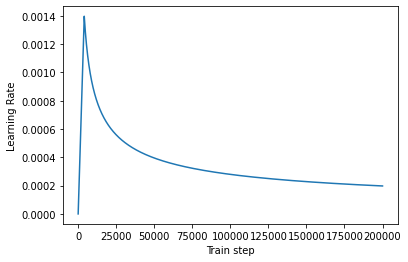

In [45]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train step")

In [46]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH -1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print('후후')

후후


In [47]:
EPOCHS = 10
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/10
185/185 [==============================] - 17s 56ms/step - loss: 1.4542 - accuracy: 0.0279
Epoch 2/10
185/185 [==============================] - 10s 55ms/step - loss: 1.1834 - accuracy: 0.0495
Epoch 3/10
185/185 [==============================] - 10s 56ms/step - loss: 1.0074 - accuracy: 0.0503
Epoch 4/10
185/185 [==============================] - 10s 56ms/step - loss: 0.9300 - accuracy: 0.0542
Epoch 5/10
185/185 [==============================] - 10s 55ms/step - loss: 0.8725 - accuracy: 0.0574
Epoch 6/10
185/185 [==============================] - 10s 55ms/step - loss: 0.8130 - accuracy: 0.0614
Epoch 7/10
185/185 [==============================] - 10s 55ms/step - loss: 0.7465 - accuracy: 0.0674
Epoch 8/10
185/185 [==============================] - 10s 55ms/step - loss: 0.6729 - accuracy: 0.0753
Epoch 9/10
185/185 [==============================] - 10s 55ms/step - loss: 0.5933 - accuracy: 0.0839
Epoch 10/10
185/185 [==============================] - 10s 55ms/step - loss: 0.511

In [48]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)
    
    #입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가
    # ex) where have you been? [[8331 86 30 5 1059 7 8332]]
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)
    
    #디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없으므로 시작 토큰만 별도 저장 ex ) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)
    
    #디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
        #디코더는 최대 MAX_LENGTH의 길이 만큼 다음 단어 예측을 반복합니다.
        
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]
        
        #현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
        
        #만약 현재 예측한 단어가 종료 토큰이라면, for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break
            
        #예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        #이 output_sequence는 다시 디코더의 입력이 됩니다.
        
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)
        
        
    return tf.squeeze(output_sequence, axis=0)

print('뮤뮤~')

뮤뮤~


In [49]:
def sentence_generation(sentence):
    #입력 문장에 대해서 디코더를 동작 시켜, 예측된 정수 시퀀스를 리턴 받음.
    prediction = decoder_inference(sentence)
    
    #정수 시퀀스를 다시 텍스트 시퀀스로 변환시킴.
    
    predicted_sentence = tokenizer.decode(
    
        [i for i in prediction if i < tokenizer.vocab_size])
    
    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))
    
    return predicted_sentence

print("휴휴")

휴휴


In [50]:
sentence_generation('세상에서 가장 중요한 것은?')

입력 : 세상에서 가장 중요한 것은?
출력 : 직접 물어보세요.


'직접 물어보세요.'

In [51]:
sentence_generation("군밤 있어요?")

입력 : 군밤 있어요?
출력 : 직접 물어보세요.


'직접 물어보세요.'

In [52]:
sentence_generation("참으로 당찬 사람이네요")

입력 : 참으로 당찬 사람이네요
출력 : 좋은 생각이에요.


'좋은 생각이에요.'

#회고 
충분한 시간만 있다면 생각해서 결론을 도출할 수 있을 것 같습니다.
시간을 충분히 들이니 결과가 나오니 좋습니다.